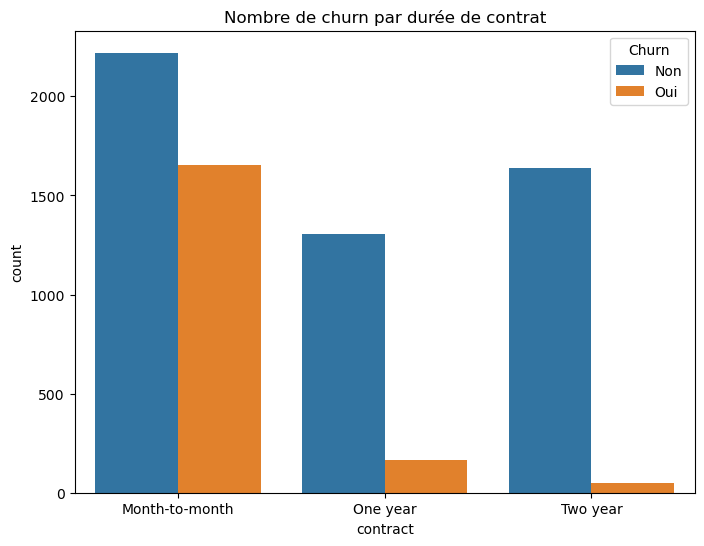

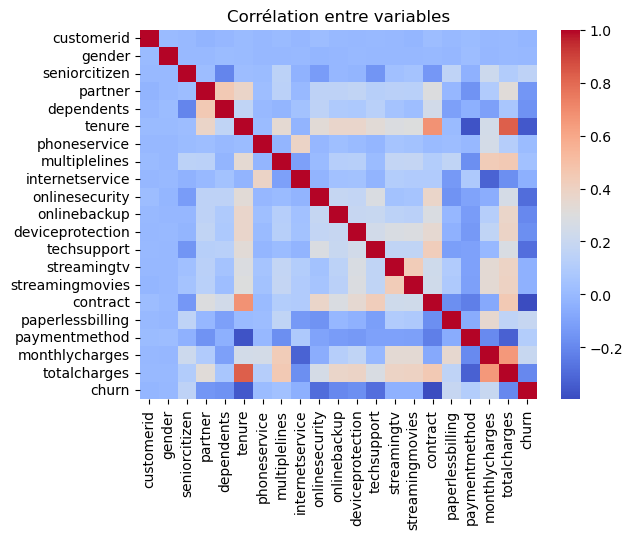

Résultats de prédiction :
Matrice de confusion : 
 [[934 109]
 [155 209]]
Statistiques (0 : non churn, 1 : churn) : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1043
           1       0.66      0.57      0.61       364

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407

ROC AUC: 0.7348347960764068


In [10]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 2. Connexion SQL + Importation des données
DB_USER = 'postgres'
DB_PASSWORD = 'postgres'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'postgres'

engine = sqlalchemy.create_engine(
    f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
)

df = pd.read_sql('SELECT * FROM clients', engine)

# 3. Préparation des données
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
df = df.dropna()

# Encodage
for col in df.select_dtypes(include=['object']):
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Analyse exploratoire
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Nombre de churn par durée de contrat')
contract_labels = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
plt.xticks(ticks=[0,1,2], labels=[contract_labels[i] for i in range(3)])
plt.legend(title='Churn', labels=['Non', 'Oui'])
plt.show()

corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')
plt.title('Corrélation entre variables')
plt.show()

# 5. Modélisation
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Résultats des prédictions :")
print("Matrice de confusion : \n", confusion_matrix(y_test, y_pred))
print("Statistiques (0 : non churn, 1 : churn) : \n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))